In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
df = pd.read_excel("input/Concrete_Data.xls")
display(df.head())
display(df.shape)

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

(1030, 9)

In [3]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
df.columns = ["Cement", "Blast", "Fly", "Water", "Super", "Coarse", "Fine", "Age", "Label"]
y = np.asarray(df["Label"])
X = np.array(df.iloc[:, 0:8])

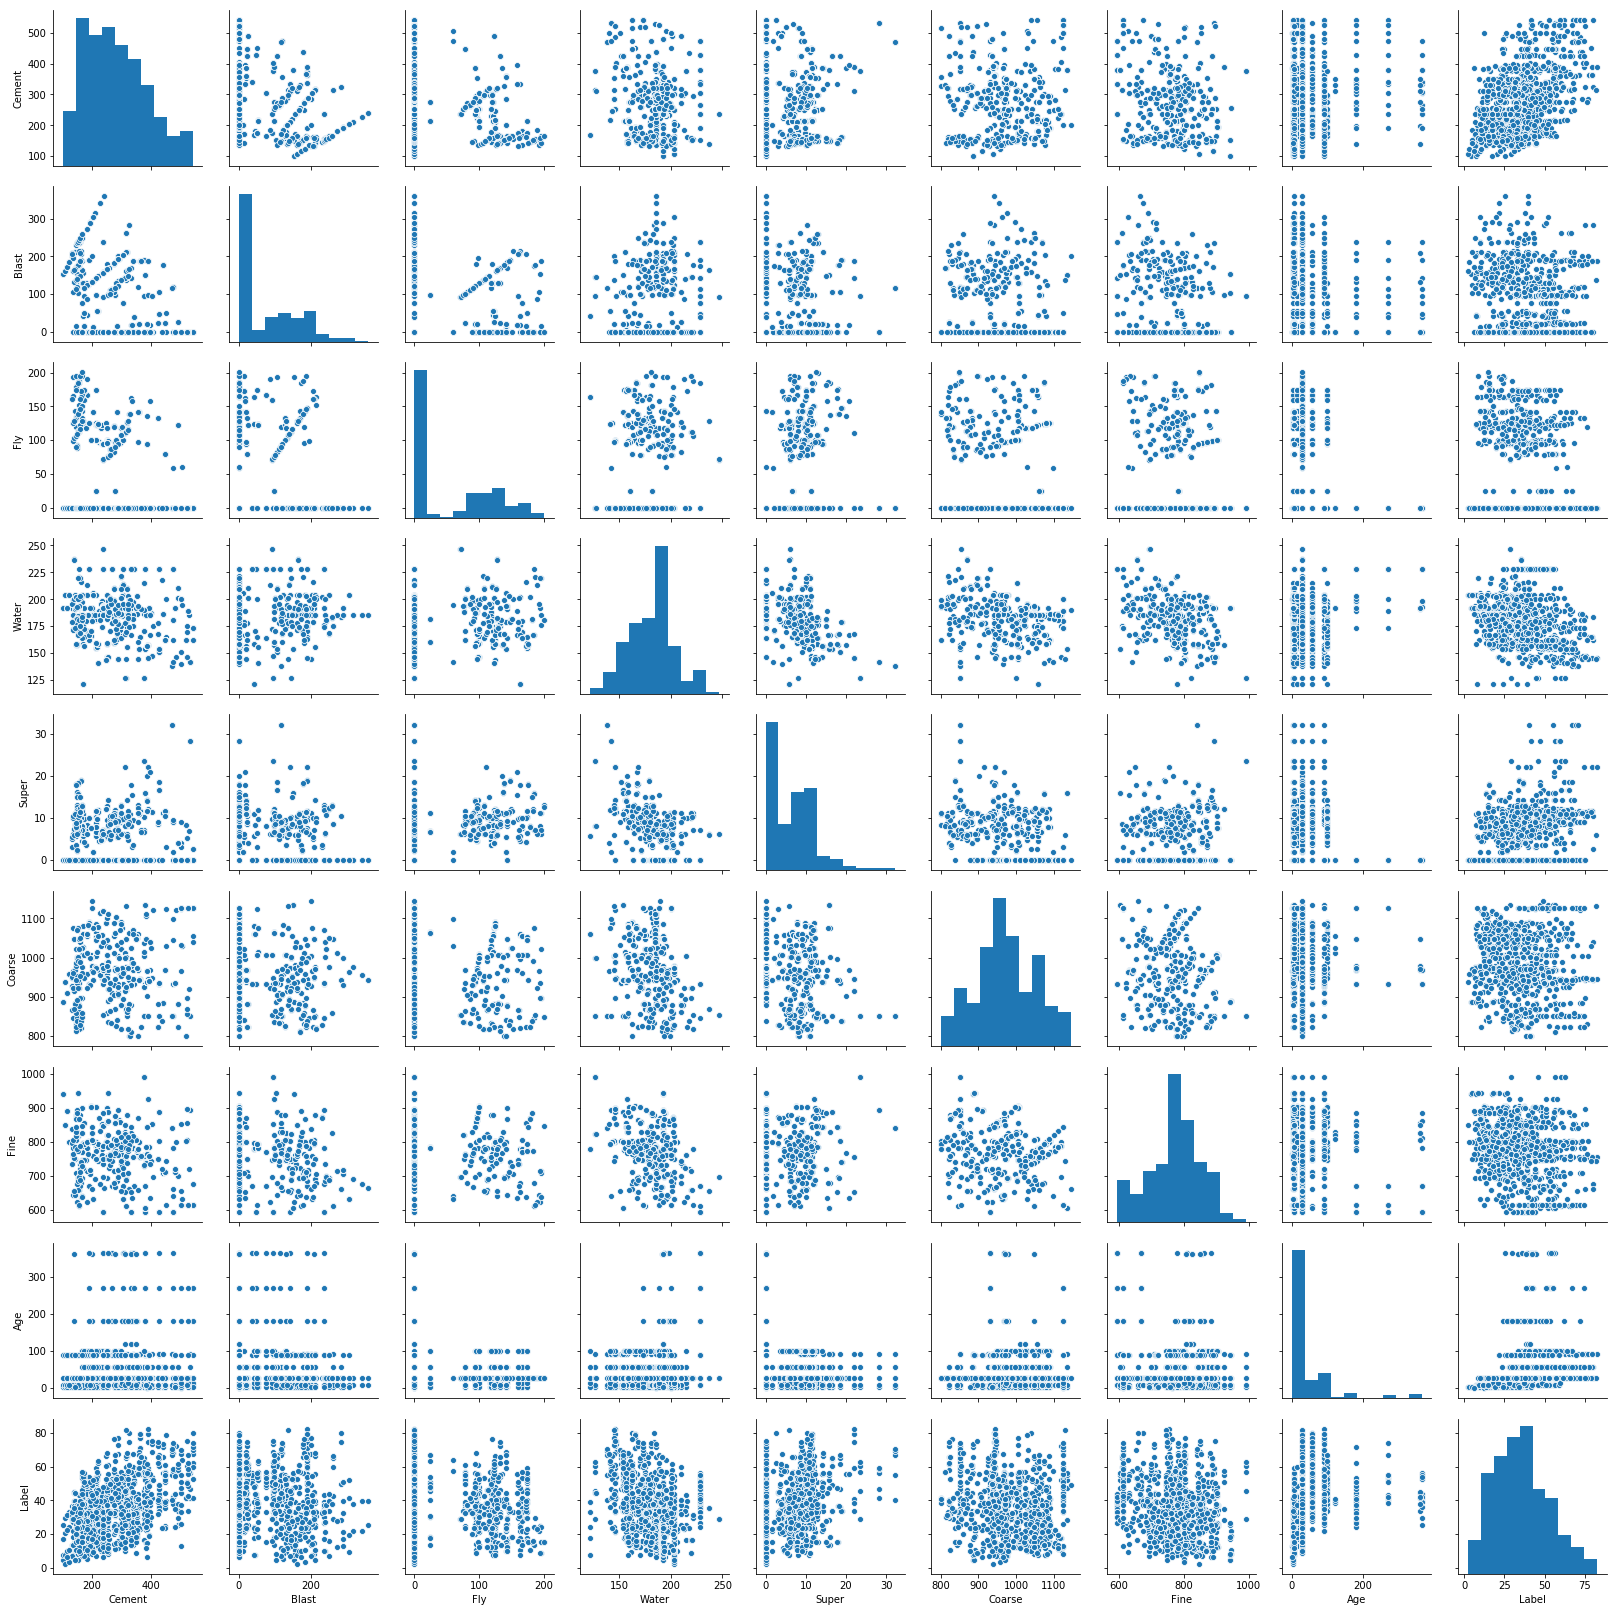

In [5]:
sns.pairplot(df)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(X, y)
y_pred_lr = reg.predict(X)

import statsmodels.api as sm
X = sm.add_constant(X)
gamma_model = sm.GLM(y, X, family=sm.families.Gamma())
gamma_result = gamma_model.fit()
y_pred_glm = gamma_result.predict(X)

display(mean_absolute_error(y, y_pred_lr))
display(mean_absolute_error(y, y_pred_glm))

/Users/daikionodera/ENV_py3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


10.001637122810545

10.5854180322897

In [13]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

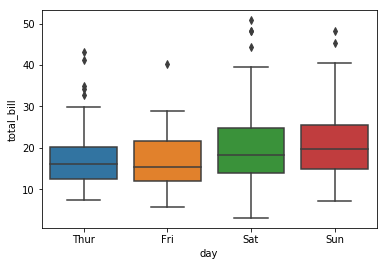

In [14]:
sns.boxplot(x="day", y="total_bill", data=tips)

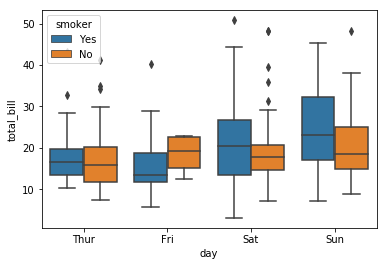

In [16]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

In [19]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, split=True)

In [26]:
df = pd.read_excel("input/sales-funnel.xlsx")
display(df.shape)
df

(17, 8)

Account                          Name            Rep        Manager  \
0    714466               Trantow-Barrows   Craig Booker   Debra Henley   
1    714466               Trantow-Barrows   Craig Booker   Debra Henley   
2    714466               Trantow-Barrows   Craig Booker   Debra Henley   
3    737550  Fritsch, Russel and Anderson   Craig Booker   Debra Henley   
4    146832                  Kiehn-Spinka  Daniel Hilton   Debra Henley   
5    218895                     Kulas Inc  Daniel Hilton   Debra Henley   
6    218895                     Kulas Inc  Daniel Hilton   Debra Henley   
7    412290                 Jerde-Hilpert     John Smith   Debra Henley   
8    740150                    Barton LLC     John Smith   Debra Henley   
9    141962                    Herman LLC    Cedric Moss  Fred Anderson   
10   163416                   Purdy-Kunde    Cedric Moss  Fred Anderson   
11   239344                    Stokes LLC    Cedric Moss  Fred Anderson   
12   239344                    Stokes LLC    Cedric Moss  Fred Anderson   
13   307599   Kassulke, Ondricka and Metz     Wendy Yule  Fred Anderson   
14   688981                   Keeling LLC     Wendy Yule  Fred Anderson   
15   729833                     Koepp Ltd     Wendy Yule  Fred Anderson   
16   729833                     Koepp Ltd     Wendy Yule  Fred Anderson   

        Product  Quantity   Price     Status  
0           CPU         1   30000  presented  
1      Software         1   10000  presented  
2   Maintenance         2    5000    pending  
3           CPU         1   35000   declined  
4           CPU         2   65000        won  
5           CPU         2   40000    pending  
6      Software         1   10000  presented  
7   Maintenance         2    5000    pending  
8           CPU         1   35000   declined  
9           CPU         2   65000        won  
10          CPU         1   30000  presented  
11  Maintenance         1    5000    pending  
12     Software         1   10000  presented  
13  Maintenance         3    7000        won  
14          CPU         5  100000        won  
15          CPU         2   65000   declined  
16      Monitor         2    5000  presented

In [22]:
df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)
df.head()

Account                          Name            Rep       Manager  \
0   714466               Trantow-Barrows   Craig Booker  Debra Henley   
1   714466               Trantow-Barrows   Craig Booker  Debra Henley   
2   714466               Trantow-Barrows   Craig Booker  Debra Henley   
3   737550  Fritsch, Russel and Anderson   Craig Booker  Debra Henley   
4   146832                  Kiehn-Spinka  Daniel Hilton  Debra Henley   

       Product  Quantity  Price     Status  
0          CPU         1  30000  presented  
1     Software         1  10000  presented  
2  Maintenance         2   5000    pending  
3          CPU         1  35000   declined  
4          CPU         2  65000        won

In [27]:
# Each value is averaged

In [24]:
pd.pivot_table(df,index=["Name"])

Account   Price  Quantity
Name                                                   
Barton LLC                     740150   35000  1.000000
Fritsch, Russel and Anderson   737550   35000  1.000000
Herman LLC                     141962   65000  2.000000
Jerde-Hilpert                  412290    5000  2.000000
Kassulke, Ondricka and Metz    307599    7000  3.000000
Keeling LLC                    688981  100000  5.000000
Kiehn-Spinka                   146832   65000  2.000000
Koepp Ltd                      729833   35000  2.000000
Kulas Inc                      218895   25000  1.500000
Purdy-Kunde                    163416   30000  1.000000
Stokes LLC                     239344    7500  1.000000
Trantow-Barrows                714466   15000  1.333333

In [28]:
pd.pivot_table(df,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [39]:
# Numerical data should be included in a column, not disperse as multiple columns

In [32]:
df = pd.read_excel("input/02_Religion.xls")
display(df.shape)
df.head()

(10, 7)

religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  $50-75k
0           Agnostic     27       34       60       81       76      137
1            Atheist     12       27       37       52       35       70
2           Buddhist     27       21       30       34       33       58
3           Catholic    418      617      732      670      638     1116
4  Don’tknow/refused     15       14       15       11       10       35

In [33]:
# use all columns if you don't specify the column to use
df_long = pd.melt(df ,id_vars='religion', var_name='range', value_name='count')
display(df_long.shape)
df_long.head()

religion  range  count
0           Agnostic  <$10k     27
1            Atheist  <$10k     12
2           Buddhist  <$10k     27
3           Catholic  <$10k    418
4  Don’tknow/refused  <$10k     15

In [42]:
df = pd.read_excel("input/04_HitChart.xls")
display(df.shape)
df.head()

(8, 8)

year         artist                    track      time date.entered  wk1  \
0  2000          2 Pac           Baby Don’t Cry  04:22:00   2000-02-26   87   
1  2000        2Ge+her  The Hardest Part Of ...  03:15:00   2000-09-02   91   
2  2000   3 Doors Down               Kryptonite  03:53:00   2000-04-08   81   
3  2000           98^0  Give Me Just One Nig...  03:24:00   2000-08-19   51   
4  2000        A*Teens            Dancing Queen  03:44:00   2000-07-08   97   

   wk2  wk3  
0   82   72  
1   87   92  
2   70   68  
3   39   34  
4   97   96

In [43]:
df_long = pd.melt(df, id_vars=['year','artist','track','time','date.entered'], var_name='week', value_name='rank')
display(df_long.shape)
df_long.head()

(24, 7)

year         artist                    track      time date.entered week  \
0  2000          2 Pac           Baby Don’t Cry  04:22:00   2000-02-26  wk1   
1  2000        2Ge+her  The Hardest Part Of ...  03:15:00   2000-09-02  wk1   
2  2000   3 Doors Down               Kryptonite  03:53:00   2000-04-08  wk1   
3  2000           98^0  Give Me Just One Nig...  03:24:00   2000-08-19  wk1   
4  2000        A*Teens            Dancing Queen  03:44:00   2000-07-08  wk1   

   rank  
0    87  
1    91  
2    81  
3    51  
4    97

In [48]:
# Column could be separated into multiple columns

In [45]:
df = pd.read_excel('input/05_TB.xls')
display(df.shape)
df.head()

(10, 11)

country  year  m014  m1524  m2534  m3544  m4554  m5564   m65  mu  f014
0      AD  2000   0.0    0.0    1.0    0.0      0      0   0.0 NaN   NaN
1      AE  2000   2.0    4.0    4.0    6.0      5     12  10.0 NaN   3.0
2      AF  2000  52.0  228.0  183.0  149.0    129     94  80.0 NaN  93.0
3      AG  2000   0.0    0.0    0.0    0.0      0      0   1.0 NaN   1.0
4      AL  2000   2.0   19.0   21.0   14.0     24     19  16.0 NaN   3.0

In [46]:
df_long = pd.melt(df, id_vars=['country','year'], var_name='variable', value_name='value')
display(df_long.shape)
df_long.head()

(90, 4)

country  year variable  value
0      AD  2000     m014    0.0
1      AE  2000     m014    2.0
2      AF  2000     m014   52.0
3      AG  2000     m014    0.0
4      AL  2000     m014    2.0

In [47]:
df_long['gender'] = df_long.variable.str[0]
df_long['age'] = df_long.variable.str[1:]
df_long.head()

country  year variable  value gender  age
0      AD  2000     m014    0.0      m  014
1      AE  2000     m014    2.0      m  014
2      AF  2000     m014   52.0      m  014
3      AG  2000     m014    0.0      m  014
4      AL  2000     m014    2.0      m  014

In [58]:
# One record(raw) should be a unique. When you find out there are repetitions within records, you may want to use melt and pivot_table to tidy the dataframe

In [50]:
df = pd.read_excel('input/06_Weather.xls')
df.head()

id  year  month element  d1    d2    d3  d4    d5  d6  d7  d8
0  MX17004  2010      1    tmax NaN   NaN   NaN NaN   NaN NaN NaN NaN
1  MX17004  2010      1    tmin NaN   NaN   NaN NaN   NaN NaN NaN NaN
2  MX17004  2010      2    tmax NaN  27.3  24.1 NaN   NaN NaN NaN NaN
3  MX17004  2010      2    tmin NaN  14.4  14.4 NaN   NaN NaN NaN NaN
4  MX17004  2010      3    tmax NaN   NaN   NaN NaN  32.1 NaN NaN NaN

In [51]:
df_long = pd.melt(df,id_vars=['id','year','month','element'], var_name='day', value_name='temp')
df_long.head()

id  year  month element day  temp
0  MX17004  2010      1    tmax  d1   NaN
1  MX17004  2010      1    tmin  d1   NaN
2  MX17004  2010      2    tmax  d1   NaN
3  MX17004  2010      2    tmin  d1   NaN
4  MX17004  2010      3    tmax  d1   NaN

In [57]:
df_tidy = df_long.pivot_table(index=['id','year','month','day'], columns='element', values='temp')
df_tidy.head()

element                 tmax  tmin
id      year month day            
MX17004 2010 2     d2   27.3  14.4
                   d3   24.1  14.4
             3     d5   32.1  14.2

In [54]:
df_tidy = df_tidy.reset_index()
df_tidy.head()

element       id  year  month day  tmax  tmin
0        MX17004  2010      2  d2  27.3  14.4
1        MX17004  2010      2  d3  24.1  14.4
2        MX17004  2010      3  d5  32.1  14.2

In [59]:
df = pd.read_excel("input/04_HitChart.xls")
df_long = pd.melt(df, id_vars=['year','artist','track','time','date.entered'], var_name='week', value_name='rank')
df_long[df_long.track =='Baby Don’t Cry'].head()

year  artist           track      time date.entered week  rank
0   2000   2 Pac  Baby Don’t Cry  04:22:00   2000-02-26  wk1    87
8   2000   2 Pac  Baby Don’t Cry  04:22:00   2000-02-26  wk2    82
16  2000   2 Pac  Baby Don’t Cry  04:22:00   2000-02-26  wk3    72

In [60]:
df_songs = df_long[['year','artist','track','time']]
df_songs.head()

year         artist                    track      time
0  2000          2 Pac           Baby Don’t Cry  04:22:00
1  2000        2Ge+her  The Hardest Part Of ...  03:15:00
2  2000   3 Doors Down               Kryptonite  03:53:00
3  2000           98^0  Give Me Just One Nig...  03:24:00
4  2000        A*Teens            Dancing Queen  03:44:00

In [65]:
# drop duplicates  to get unique list of songs
df_songs = df_songs.drop_duplicates()
df_songs.head()

year         artist                    track      time
0  2000          2 Pac           Baby Don’t Cry  04:22:00
1  2000        2Ge+her  The Hardest Part Of ...  03:15:00
2  2000   3 Doors Down               Kryptonite  03:53:00
3  2000           98^0  Give Me Just One Nig...  03:24:00
4  2000        A*Teens            Dancing Queen  03:44:00

In [67]:
# id would be used as reference to another dataframe
df_songs['id'] = range(len(df_songs))
df_songs.head()

year         artist                    track      time  id
0  2000          2 Pac           Baby Don’t Cry  04:22:00   0
1  2000        2Ge+her  The Hardest Part Of ...  03:15:00   1
2  2000   3 Doors Down               Kryptonite  03:53:00   2
3  2000           98^0  Give Me Just One Nig...  03:24:00   3
4  2000        A*Teens            Dancing Queen  03:44:00   4

In [68]:
df_ratings = df_long.merge(df_songs, on=['year','artist','track','time'])
df_ratings.head()

year    artist                    track      time date.entered week  rank  \
0  2000     2 Pac           Baby Don’t Cry  04:22:00   2000-02-26  wk1    87   
1  2000     2 Pac           Baby Don’t Cry  04:22:00   2000-02-26  wk2    82   
2  2000     2 Pac           Baby Don’t Cry  04:22:00   2000-02-26  wk3    72   
3  2000   2Ge+her  The Hardest Part Of ...  03:15:00   2000-09-02  wk1    91   
4  2000   2Ge+her  The Hardest Part Of ...  03:15:00   2000-09-02  wk2    87   

   id  
0   0  
1   0  
2   0  
3   1  
4   1

In [70]:
# df_ratings would be searched when users want to know the week and rank based on id
df_ratings = df_ratings[['id','date.entered','week','rank']]
df_ratings.head()

id date.entered week  rank
0   0   2000-02-26  wk1    87
1   0   2000-02-26  wk2    82
2   0   2000-02-26  wk3    72
3   1   2000-09-02  wk1    91
4   1   2000-09-02  wk2    87

In [74]:
# Concat dataframes from some separate dataframes

In [73]:
import glob
concat_files = glob.glob('input/concat*')
list_concat_df = [pd.read_csv(csv_file) for csv_file in concat_files]
concat_df = pd.concat(list_concat_df, ignore_index=True)
concat_df.head()

A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4